In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

In [30]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [31]:
type(dataset)


pandas.core.frame.DataFrame

In [32]:
X = dataset.iloc[:,3:13]

In [33]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [34]:
geo = pd.get_dummies(X['Geography'], drop_first=True)

In [35]:
sex = pd.get_dummies(X['Gender'],drop_first=True)

In [36]:
X=X.drop(['Geography','Gender'], axis=1)

In [37]:
X=pd.concat([X,geo,sex], axis=1)

In [38]:
y = dataset.iloc[:,13]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
X_train = sc.fit_transform(X_train)

In [44]:
X_test = sc.transform(X_test)

In [45]:
import keras

In [46]:
from keras.models import Sequential
from keras.layers import Dense, ReLU, LeakyReLU, Dropout

In [47]:
sq= Sequential()

In [48]:
sq.add(Dense(units = 3, kernel_initializer = 'he_uniform', activation='relu', input_dim =11 ))

In [49]:
sq.add(Dense(units = 4, kernel_initializer = 'glorot_uniform', activation='sigmoid'))
sq.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [50]:
sq.compile(optimizer='Adamax', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [51]:
model_history = sq.fit(X_train,y_train, batch_size=10, validation_split=0.33, epochs=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 235us/step - loss: 0.5635 - acc: 0.7574 - val_loss: 0.5047 - val_acc: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 165us/step - loss: 0.4969 - acc: 0.7962 - val_loss: 0.4922 - val_acc: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 219us/step - loss: 0.4824 - acc: 0.7962 - val_loss: 0.4773 - val_acc: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 170us/step - loss: 0.4653 - acc: 0.7962 - val_loss: 0.4614 - val_acc: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 173us/step - loss: 0.4481 - acc: 0.7981 - val_loss: 0.4475 - val_acc: 0.7986
Epoch 6/100
5359/5359 [==============================] - 1s 189us/step - loss: 0.4358 - acc: 0.8059 - val_loss: 0.4404 - val_acc: 0.8050
Epoch 7/100
5359/5359 [==============================] - 1s 183us/step - loss: 0.4283 - acc: 0.8099 - val_loss: 0.4360 - val_acc: 

5359/5359 [==============================] - 1s 180us/step - loss: 0.3407 - acc: 0.8623 - val_loss: 0.3570 - val_acc: 0.8576
Epoch 61/100
5359/5359 [==============================] - 1s 156us/step - loss: 0.3406 - acc: 0.8634 - val_loss: 0.3572 - val_acc: 0.8569
Epoch 62/100
5359/5359 [==============================] - 2s 296us/step - loss: 0.3402 - acc: 0.8623 - val_loss: 0.3575 - val_acc: 0.8557
Epoch 63/100
5359/5359 [==============================] - 2s 342us/step - loss: 0.3399 - acc: 0.8597 - val_loss: 0.3563 - val_acc: 0.8580
Epoch 64/100
5359/5359 [==============================] - 2s 299us/step - loss: 0.3399 - acc: 0.8619 - val_loss: 0.3563 - val_acc: 0.8569
Epoch 65/100
5359/5359 [==============================] - 2s 292us/step - loss: 0.3395 - acc: 0.8614 - val_loss: 0.3562 - val_acc: 0.8576
Epoch 66/100
5359/5359 [==============================] - 1s 198us/step - loss: 0.3395 - acc: 0.8623 - val_loss: 0.3560 - val_acc: 0.8569
Epoch 67/100
5359/5359 [=======================

In [52]:
y_pred = sq.predict(X_test)

In [53]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [54]:
y_pred

array([[0.28589937],
       [0.3315558 ],
       [0.20947075],
       ...,
       [0.13371807],
       [0.12344772],
       [0.19474742]], dtype=float32)

In [55]:
y_pred = (y_pred>0.5)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
accuracy_score(y_test, y_pred)

0.8625

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
error_rate=[]

In [66]:
for i in range(1,40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

In [67]:
py.figure(figsize=[15.0,15.0])

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

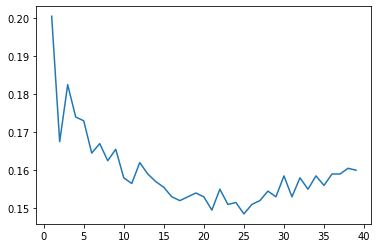

In [68]:
py.plot(range(1,40), error_rate)


In [69]:
kn = KNeighborsClassifier(n_neighbors=16)

In [70]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [71]:
y_pred =  kn.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred)

0.847